<a href="https://colab.research.google.com/github/mahmoodtt1/OR/blob/main/Copy_of_Sioux_Falls_7_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# install needed libraries

!pip install networkx matplotlib

# install pyomo solvers.

!apt-get install -y glpk-utils

!apt-get install -y coinor-cbc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
glpk-utils is already the newest version (5.0-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
coinor-cbc is already the newest version (2.10.7+ds1-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [21]:
# Define the Sioux Falls node coordinates
def get_sioux_falls_coordinates():
    return {
        1:  (-96.77041974, 43.61282792),
        2:  (-96.71125063, 43.60581298),
        3:  (-96.77430341, 43.57296160),
        4:  (-96.74716843, 43.56365362),
        5:  (-96.73156909, 43.56403357),
        6:  (-96.71164389, 43.58758553),
        7:  (-96.69342281, 43.56384360),
        8:  (-96.71138171, 43.56232379),
        9:  (-96.73124137, 43.54859634),
        10: (-96.73143801, 43.54527088),
        11: (-96.74684071, 43.54413068),
        12: (-96.78013678, 43.54394065),
        13: (-96.79337655, 43.49070718),
        14: (-96.75103549, 43.52930613),
        15: (-96.73150355, 43.52940117),
        16: (-96.71138171, 43.54674361),
        17: (-96.71138171, 43.54128009),
        18: (-96.69407825, 43.54674361),
        19: (-96.71131617, 43.52959125),
        20: (-96.71118508, 43.51533350),
        21: (-96.73097920, 43.51048509),
        22: (-96.73124137, 43.51485818),
        23: (-96.75090441, 43.51485818),
        24: (-96.74920028, 43.50316422),
    }

# Define the Sioux Falls network data
def load_sioux_falls_data():
    """
    Loads the Sioux Falls network data.
    Returns:
        nodes: List of node IDs
        arcs: List of tuples (from_node, to_node)
        arc_data: Dict with keys as (from_node, to_node) and values as dicts of attributes
    """
    nodes = list(range(1, 25))  # Sioux Falls has 24 nodes

    raw_arc_data = [
        (1, 2, 25900.20064, 6, 6), (1, 3, 23403.47319, 4, 4),
        (2, 1, 25900.20064, 6, 6), (2, 6, 4958.180928, 5, 5),
        (3, 1, 23403.47319, 4, 4), (3, 4, 17110.52372, 4, 4),
        (3, 12, 23403.47319, 4, 4), (4, 3, 17110.52372, 4, 4),
        (4, 5, 17782.7941, 2, 2), (4, 11, 4908.82673, 6, 6),
        (5, 4, 17782.7941, 2, 2), (5, 6, 4947.995469, 4, 4),
        (5, 9, 10000, 5, 5), (6, 2, 4958.180928, 5, 5),
        (6, 5, 4947.995469, 4, 4), (6, 8, 4898.587646, 2, 2),
        (7, 8, 7841.81131, 3, 3), (7, 18, 23403.47319, 2, 2),
        (8, 6, 4898.587646, 2, 2), (8, 7, 7841.81131, 3, 3),
        (8, 9, 5050.193156, 10, 10), (8, 16, 5045.822583, 5, 5),
        (9, 5, 10000, 5, 5), (9, 8, 5050.193156, 10, 10),
        (9, 10, 13915.78842, 3, 3), (10, 9, 13915.78842, 3, 3),
        (10, 11, 10000, 5, 5), (10, 15, 13512.00155, 6, 6),
        (10, 16, 4854.917717, 4, 4), (10, 17, 4993.510694, 8, 8),
        (11, 4, 4908.82673, 6, 6), (11, 10, 10000, 5, 5),
        (11, 12, 4908.82673, 6, 6), (11, 14, 4876.508287, 4, 4),
        (12, 3, 23403.47319, 4, 4), (12, 11, 4908.82673, 6, 6),
        (12, 13, 25900.20064, 3, 3), (13, 12, 25900.20064, 3, 3),
        (13, 24, 5091.256152, 4, 4), (14, 11, 4876.508287, 4, 4),
        (14, 15, 5127.526119, 5, 5), (14, 23, 4924.790605, 4, 4),
        (15, 10, 13512.00155, 6, 6), (15, 14, 5127.526119, 5, 5),
        (15, 19, 14564.75315, 3, 3), (15, 22, 9599.180565, 3, 3),
        (16, 8, 5045.822583, 5, 5), (16, 10, 4854.917717, 4, 4),
        (16, 17, 5229.910063, 2, 2), (16, 18, 19679.89671, 3, 3),
        (17, 10, 4993.510694, 8, 8), (17, 16, 5229.910063, 2, 2),
        (17, 19, 4823.950831, 2, 2), (18, 7, 23403.47319, 2, 2),
        (18, 16, 19679.89671, 3, 3), (18, 20, 23403.47319, 4, 4),
        (19, 15, 14564.75315, 3, 3), (19, 17, 4823.950831, 2, 2),
        (19, 20, 5002.607563, 4, 4), (20, 18, 23403.47319, 4, 4),
        (20, 19, 5002.607563, 4, 4), (20, 21, 5059.91234, 6, 6),
        (20, 22, 5075.697193, 5, 5), (21, 20, 5059.91234, 6, 6),
        (21, 22, 5229.910063, 2, 2), (21, 24, 4885.357564, 3, 3),
        (22, 15, 9599.180565, 3, 3), (22, 20, 5075.697193, 5, 5),
        (22, 21, 5229.910063, 2, 2), (22, 23, 5000, 4, 4),
        (23, 14, 4924.790605, 4, 4), (23, 22, 5000, 4, 4),
        (23, 24, 5078.508436, 2, 2), (24, 13, 5091.256152, 4, 4),
        (24, 21, 4885.357564, 3, 3), (24, 23, 5078.508436, 2, 2)
    ]

    arcs = []
    arc_data = {}

    for i, j, cap, length, time in raw_arc_data:
        arcs.append((i, j))
        arc_data[(i, j)] = {
            "capacity": cap,
            "length": length,
            "free_time": time
        }

    return nodes, arcs, arc_data


In [22]:
import networkx as nx

def build_nx_graph(arcs, arc_data):
    G = nx.DiGraph()
    for (i, j) in arcs:
        G.add_edge(i, j, weight=arc_data[(i, j)]['free_time'])
    return G

In [23]:
def extract_path_from_pyomo(model, source, sink):
    path = []
    current = source
    visited = set()

    while current != sink:
        visited.add(current)
        found = False
        for (i, j) in model.A:
            if i == current and model.x[i, j].value == 1:
                path.append((i, j))
                current = j
                found = True
                break
        if not found:
            raise ValueError(f"No outgoing arc from node {current}. Incomplete path.")
        if current in visited:
            raise ValueError(f"Cycle detected — loop at node {current}")
    return path


In [24]:


nodes, arcs, arc_data = load_sioux_falls_data()

# Example: Print a few arcs with their cost
for arc in arcs[:50]:
    print(f"Arc {arc}: {arc_data[arc]}")

Arc (1, 2): {'capacity': 25900.20064, 'length': 6, 'free_time': 6}
Arc (1, 3): {'capacity': 23403.47319, 'length': 4, 'free_time': 4}
Arc (2, 1): {'capacity': 25900.20064, 'length': 6, 'free_time': 6}
Arc (2, 6): {'capacity': 4958.180928, 'length': 5, 'free_time': 5}
Arc (3, 1): {'capacity': 23403.47319, 'length': 4, 'free_time': 4}
Arc (3, 4): {'capacity': 17110.52372, 'length': 4, 'free_time': 4}
Arc (3, 12): {'capacity': 23403.47319, 'length': 4, 'free_time': 4}
Arc (4, 3): {'capacity': 17110.52372, 'length': 4, 'free_time': 4}
Arc (4, 5): {'capacity': 17782.7941, 'length': 2, 'free_time': 2}
Arc (4, 11): {'capacity': 4908.82673, 'length': 6, 'free_time': 6}
Arc (5, 4): {'capacity': 17782.7941, 'length': 2, 'free_time': 2}
Arc (5, 6): {'capacity': 4947.995469, 'length': 4, 'free_time': 4}
Arc (5, 9): {'capacity': 10000, 'length': 5, 'free_time': 5}
Arc (6, 2): {'capacity': 4958.180928, 'length': 5, 'free_time': 5}
Arc (6, 5): {'capacity': 4947.995469, 'length': 4, 'free_time': 4}
Ar

In [25]:
from pyomo.environ import *

def build_shortest_path_model(nodes, arcs, arc_data, source, sink):
    model = ConcreteModel()

    model.N = Set(initialize=nodes)
    model.A = Set(within=model.N * model.N, initialize=arcs)

    model.cost = Param(model.A, initialize=lambda m, i, j: arc_data[(i, j)]['free_time'])

    model.x = Var(model.A, domain=Binary)

    model.obj = Objective(
        expr=sum(model.cost[i, j] * model.x[i, j] for (i, j) in model.A),
        sense=minimize
    )

    def flow_balance_rule(m, n):
        inflow = sum(m.x[i, j] for (i, j) in m.A if j == n)
        outflow = sum(m.x[i, j] for (i, j) in m.A if i == n)
        if n == source:
            return outflow - inflow == 1
        elif n == sink:
            return inflow - outflow == 1
        else:
            return outflow - inflow == 0

    model.flow_balance = Constraint(model.N, rule=flow_balance_rule)
    return model

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_with_shortest_path(nodes, arcs, arc_data, shortest_path, coordinates=None):
    G = nx.DiGraph()

    # Add nodes and edges
    G.add_nodes_from(nodes)
    for (i, j) in arcs:
        G.add_edge(i, j, **arc_data[(i, j)])

    pos = coordinates if coordinates else nx.spring_layout(G)

    # Base draw
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgray")
    nx.draw_networkx_edges(G, pos, edge_color="lightgray", arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Label all edges with cost
    all_labels = {(i, j): f'{d["free_time"]:.0f}' for i, j, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=all_labels, font_size=8)

    # Highlight shortest path
    if shortest_path:
        path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="salmon", node_size=500)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5, arrows=True)

        # Mark start and end distinctly
        nx.draw_networkx_nodes(G, pos, nodelist=[shortest_path[0]], node_color="lightgreen", node_size=600)
        nx.draw_networkx_nodes(G, pos, nodelist=[shortest_path[-1]], node_color="lightcoral", node_size=600)

    plt.title("Sioux Falls Network – Shortest Path")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [27]:
def draw_network_with_path(G, path_edges, source=None, sink=None):
    pos = get_sioux_falls_coordinates()

    # Node coloring logic as before
    node_colors = []
    for node in G.nodes():
        if node == source:
            node_colors.append("lightgreen")
        elif node == sink:
            node_colors.append("salmon")
        elif any(node == i or node == j for (i, j) in path_edges):
            node_colors.append("lightsalmon")
        else:
            node_colors.append("lightgray")

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="lightgray")
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    path_labels = {(i, j): G[i][j]['weight'] for (i, j) in path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=path_labels, font_color="red", font_size=8)

    plt.title("Sioux Falls Network – Shortest Path")
    plt.axis("off")
    plt.show()


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network_with_tour(nodes, arcs, arc_data, tour_edges, coordinates=None):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    for (i, j) in arcs:
        G.add_edge(i, j, **arc_data[(i, j)])

    pos = coordinates if coordinates else nx.spring_layout(G)

    # ✅ Set larger figure size
    plt.figure(figsize=(24, 20))

    # Draw all edges in light gray
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', arrows=True, alpha=0.3)

    # Highlight tour edges
    nx.draw_networkx_edges(
        G, pos,
        edgelist=tour_edges,
        edge_color='darkred',
        width=2.5,
        arrows=True
    )

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw edge labels (costs)
    edge_labels = {(i, j): f"{arc_data[(i, j)]['free_time']:.0f}" for (i, j) in arcs}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, alpha=0.5)

    plt.axis('off')
    plt.title("TSP Tour on Sioux Falls Network", fontsize=20)
    plt.show()



Shortest path from node 1 to 20:
1 → 2 → 6 → 8 → 7 → 18 → 20
Total cost (free-flow time): 22


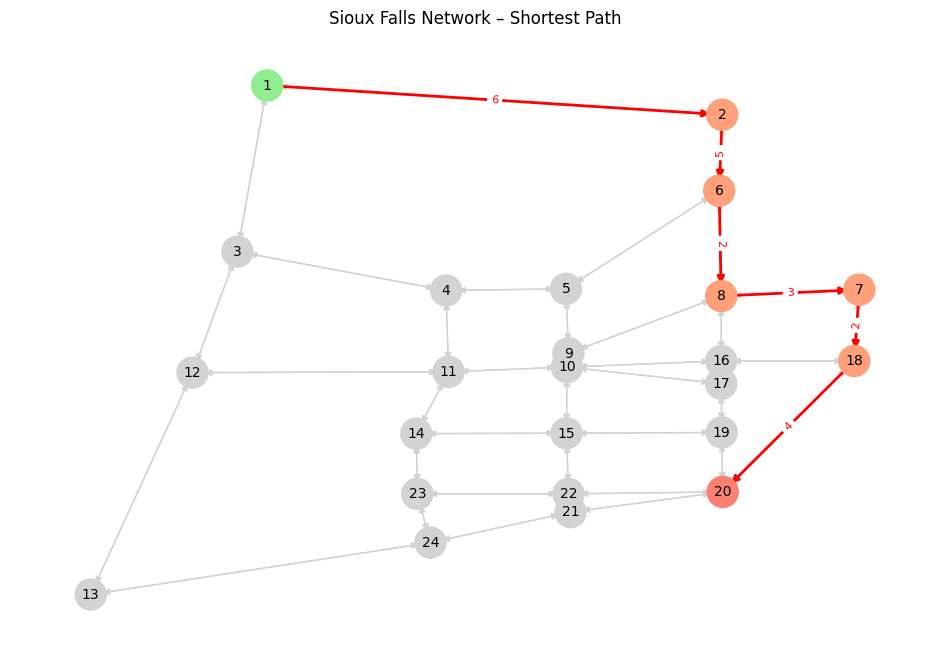

In [29]:
source = 1

sink = 20

from pyomo.opt import SolverFactory



# Load data
nodes, arcs, arc_data = load_sioux_falls_data()

# Build model for shortest path from node 1 to node 10
model = build_shortest_path_model(nodes, arcs, arc_data, source, sink)

# Solve
solver = SolverFactory("glpk", executable="/usr/bin/glpsol")

#solver = SolverFactory("glpk")  # or "cbc", "gurobi", etc.
results = solver.solve(model)






# 2. Build graph and extract path
G = build_nx_graph(arcs, arc_data)
shortest_path_edges = extract_path_from_pyomo(model, source, sink)


# Compute total cost (sum of free_time over selected path)
total_cost = sum(arc_data[(i, j)]["free_time"] for (i, j) in shortest_path_edges)

# Print path and total cost
print(f"Shortest path from node {source} to {sink}:")
print(" → ".join(str(i) for i, _ in shortest_path_edges) + f" → {shortest_path_edges[-1][1]}")
print(f"Total cost (free-flow time): {total_cost}")




# 3. Visualize
draw_network_with_path(G, shortest_path_edges, source=source, sink=sink)

In [30]:
import pyomo.environ as pyo

def build_tsp_model(nodes, arc_data):
    model = pyo.ConcreteModel()

    # Sets
    model.N = pyo.Set(initialize=nodes)
    model.A = pyo.Set(within=model.N * model.N, initialize=[(i, j) for (i, j) in arc_data if i != j])

    # Parameters
    model.cost = pyo.Param(model.A, initialize={(i, j): arc_data[(i, j)]['free_time'] for (i, j) in arc_data if i != j})

    # Variables
    model.x = pyo.Var(model.A, within=pyo.Binary)
    model.u = pyo.Var(model.N, bounds=(0, len(nodes)-1))  # Subtour elimination vars

    # Objective
    model.obj = pyo.Objective(expr=sum(model.cost[i, j] * model.x[i, j] for (i, j) in model.A), sense=pyo.minimize)

    # Constraints
    model.out_deg = pyo.Constraint(model.N, rule=lambda m, i: sum(m.x[i, j] for j in m.N if (i, j) in m.A) == 1)
    model.in_deg = pyo.Constraint(model.N, rule=lambda m, j: sum(m.x[i, j] for i in m.N if (i, j) in m.A) == 1)

    def mtz_rule(m, i, j):
        if i != j and i != nodes[0] and j != nodes[0] and (i, j) in m.A:
            return m.u[i] - m.u[j] + (len(nodes) - 1) * m.x[i, j] <= len(nodes) - 2
        return pyo.Constraint.Skip

    model.mtz = pyo.Constraint(model.N, model.N, rule=mtz_rule)

    return model


In [31]:
def solve_tsp_and_extract_tour(model):
    solver = pyo.SolverFactory("glpk", executable="/usr/bin/glpsol")  # adjust if needed
    result = solver.solve(model)

    # Extract edges used in tour
    selected_edges = [(i, j) for (i, j) in model.A if pyo.value(model.x[i, j]) > 0.5]

    # Build ordered tour
    tour = [selected_edges[0][0]]
    current = selected_edges[0][1]
    while current != tour[0]:
        tour.append(current)
        current = next(j for (i, j) in selected_edges if i == current)

    return tour, selected_edges, pyo.value(model.obj)


TSP Tour:
1 → 2 → 6 → 8 → 7 → 18 → 20 → 21 → 22 → 15 → 19 → 17 → 16 → 10 → 9 → 5 → 4 → 11 → 14 → 23 → 24 → 13 → 12 → 3 → 1
Total cost: 85.00


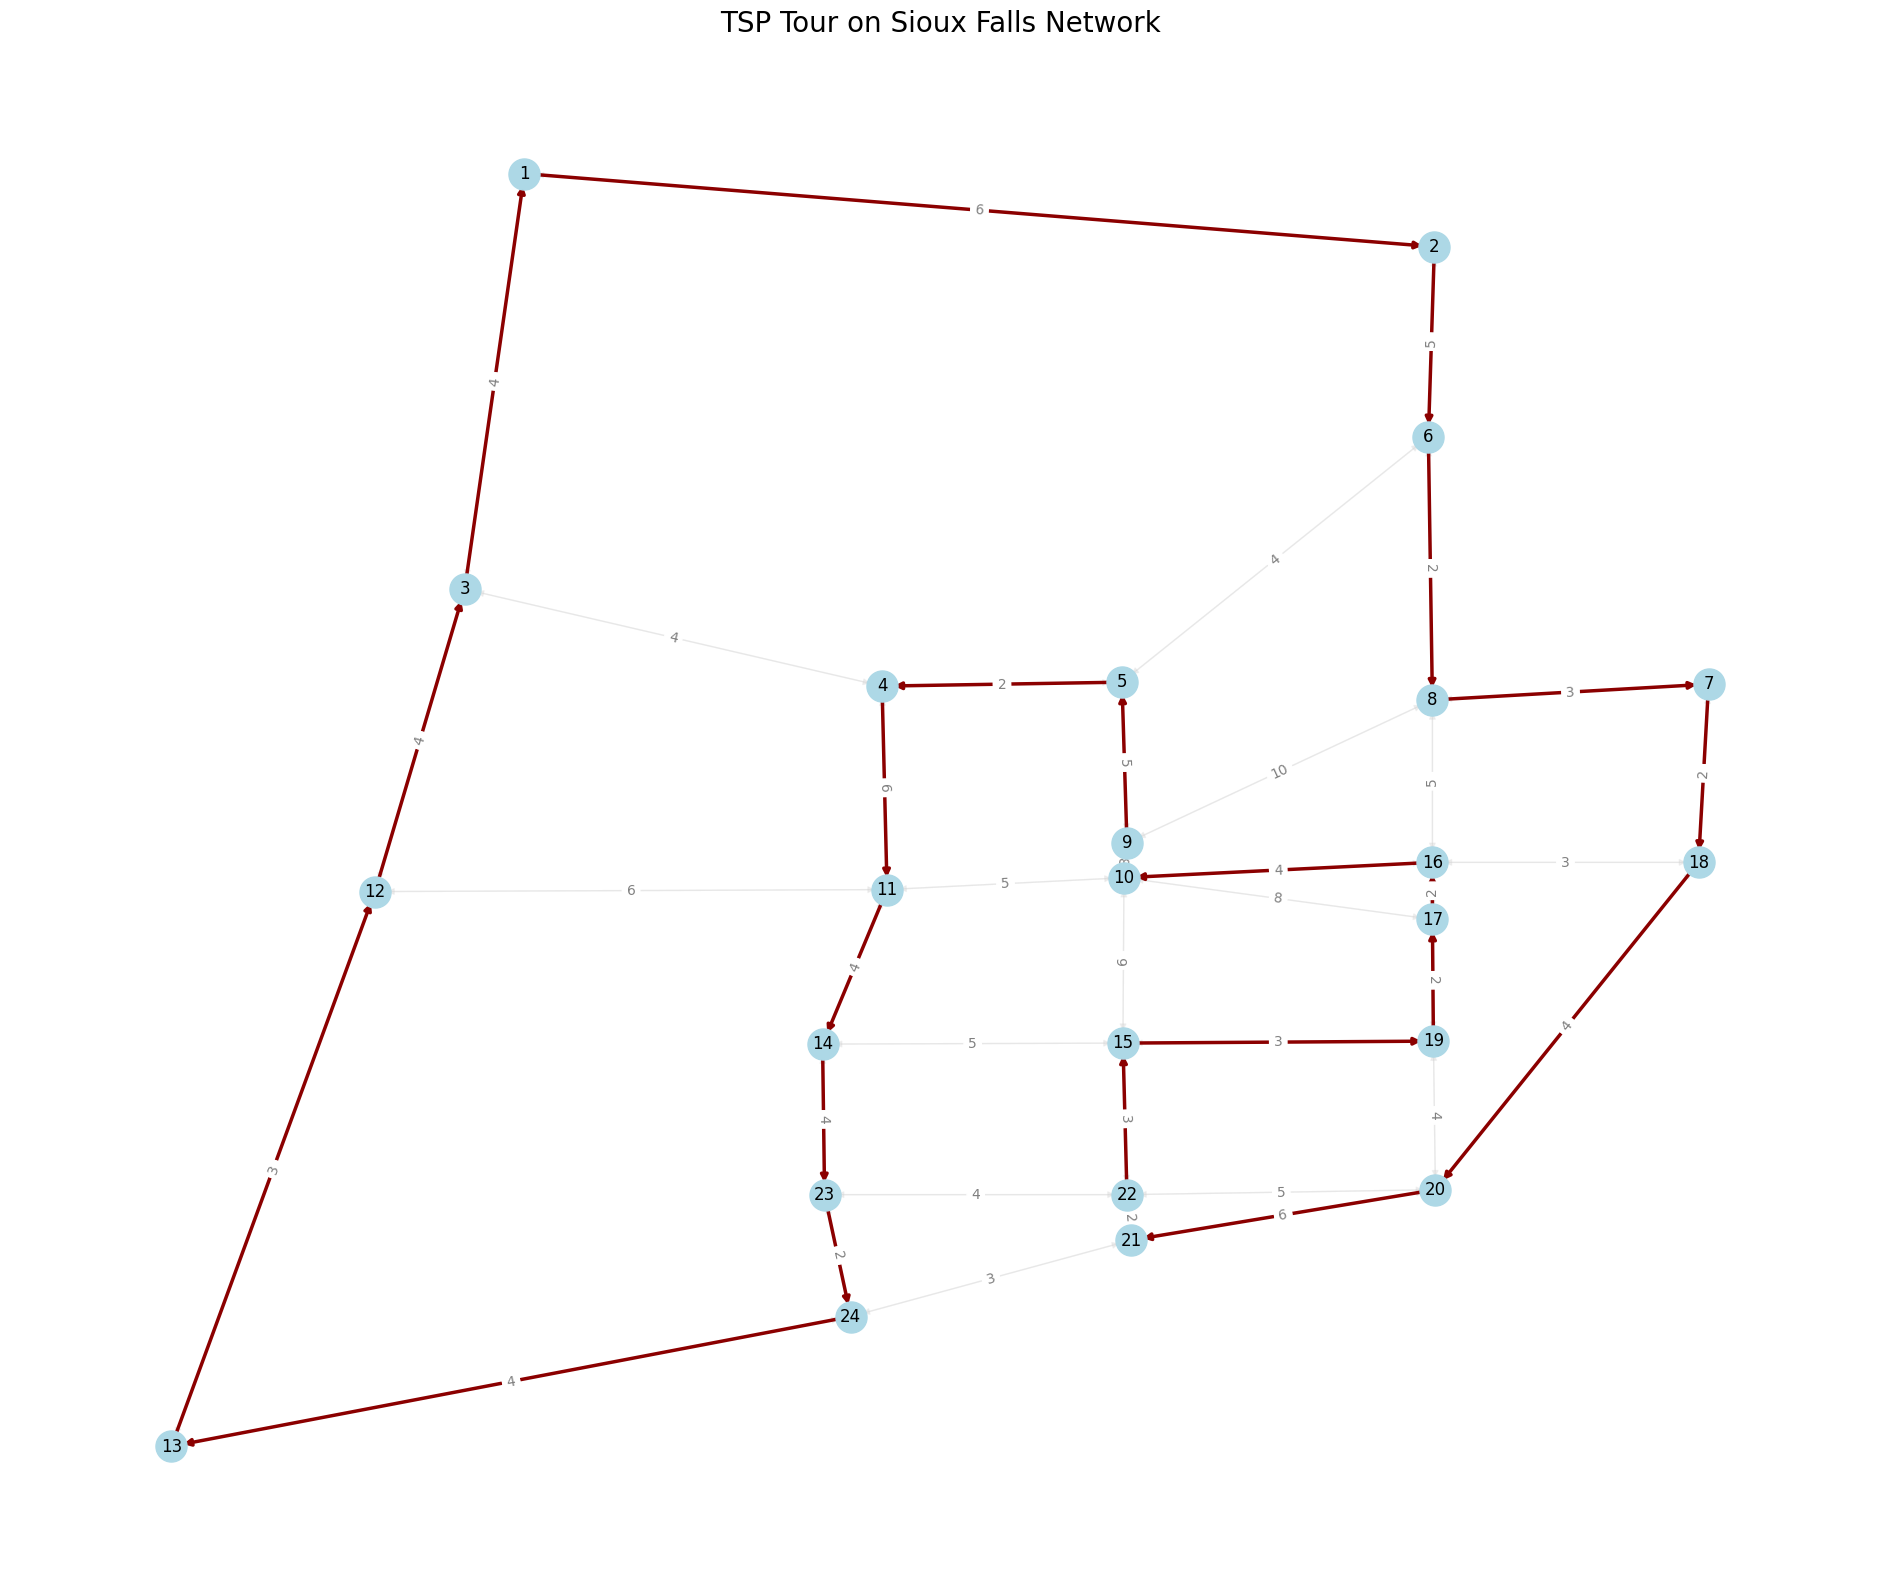

In [32]:
nodes, arcs, arc_data = load_sioux_falls_data()

tsp_model = build_tsp_model(nodes, arc_data)
tsp_tour, tsp_edges, total_cost = solve_tsp_and_extract_tour(tsp_model)

print("TSP Tour:")
print(" → ".join(map(str, tsp_tour + [tsp_tour[0]])))
print(f"Total cost: {total_cost:.2f}")


# Convert ordered tour to edge list
tsp_path_edges = [(tsp_tour[i], tsp_tour[i+1]) for i in range(len(tsp_tour) - 1)]
tsp_path_edges.append((tsp_tour[-1], tsp_tour[0]))  # return to start

# Build the graph
G = build_nx_graph(arcs, arc_data)



draw_network_with_tour(nodes, arcs, arc_data, tsp_path_edges, get_sioux_falls_coordinates())


In [33]:
from pyomo.environ import *

def build_max_flow_model_with_dummy(nodes, arcs, arc_data, source, sink):
    model = ConcreteModel()

    # Add dummy arc from sink → source
    dummy_arc = (sink, source)
    all_arcs = arcs + [dummy_arc]
    nodes_set = set(nodes)

    # Sets
    model.N = Set(initialize=nodes_set)
    model.A = Set(within=model.N * model.N, initialize=all_arcs)

    # Parameters
    full_arc_data = arc_data.copy()
    full_arc_data[dummy_arc] = {"capacity": float('inf'), "length": 0, "free_time": 0}

    capacity = {(i, j): full_arc_data[(i, j)]["capacity"] for (i, j) in all_arcs}
    model.cap = Param(model.A, initialize=capacity)

    # Variables
    model.flow = Var(model.A, domain=NonNegativeReals)

    # Objective: Maximize flow on dummy arc (sink → source)
    model.obj = Objective(expr=model.flow[dummy_arc], sense=maximize)

    # Flow conservation at all nodes
    def flow_balance_rule(model, n):
        inflow = sum(model.flow[i, j] for (i, j) in model.A if j == n)
        outflow = sum(model.flow[i, j] for (i, j) in model.A if i == n)
        return inflow == outflow
    model.flow_balance = Constraint(model.N, rule=flow_balance_rule)

    # Capacity constraints
    def capacity_rule(model, i, j):
        return model.flow[i, j] <= model.cap[i, j]
    model.capacity_limit = Constraint(model.A, rule=capacity_rule)

    return model


In [34]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_with_flows(nodes, arcs, arc_data, flow_dict, coordinates=None, title="Flow Visualization"):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    for (i, j) in arcs:
        G.add_edge(i, j, **arc_data[(i, j)])

    pos = coordinates if coordinates else nx.spring_layout(G)

    plt.figure(figsize=(24, 20))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw edges with width and labels
    edge_colors = []
    edge_widths = []
    edge_labels = {}

    max_flow = max(flow_dict.values()) if flow_dict else 1

    for (i, j) in arcs:
        flow = flow_dict.get((i, j), 0)
        cap = arc_data[(i, j)]["capacity"]
        width = 1 + 3 * (flow / max_flow)
        color = 'darkgreen' if flow > 0 else 'lightgray'
        edge_colors.append(color)
        edge_widths.append(width)

        if flow > 1e-3:
            edge_labels[(i, j)] = f"{flow:.0f} ({cap:.0f})"

    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, arrows=True, alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


✅ Maximum flow from node 1 to 20: 28361.65
Flow 4958.18 from 1 → 2
Flow 23403.47 from 1 → 3
Flow 4958.18 from 2 → 6
Flow 13403.39 from 3 → 4
Flow 10000.08 from 3 → 12
Flow 8494.56 from 4 → 5
Flow 4908.83 from 4 → 11
Flow 8554.16 from 5 → 9
Flow 59.59 from 6 → 5
Flow 4898.59 from 6 → 8
Flow 7841.81 from 7 → 18
Flow 7841.81 from 8 → 7
Flow 2106.97 from 8 → 16
Flow 5050.19 from 9 → 8
Flow 3503.96 from 9 → 10
Flow 5078.30 from 10 → 15
Flow 3449.21 from 10 → 16
Flow 5023.55 from 11 → 10
Flow 4794.10 from 11 → 14
Flow 4908.83 from 12 → 11
Flow 5091.26 from 12 → 13
Flow 5091.26 from 13 → 24
Flow 4794.10 from 14 → 23
Flow 5002.61 from 15 → 19
Flow 75.70 from 15 → 22
Flow 5556.18 from 16 → 18
Flow 13397.99 from 18 → 20
Flow 5002.61 from 19 → 20
Flow 4885.36 from 21 → 20
Flow 5075.70 from 22 → 20
Flow 5000.00 from 23 → 22
Flow 4885.36 from 24 → 21
Flow 205.90 from 24 → 23


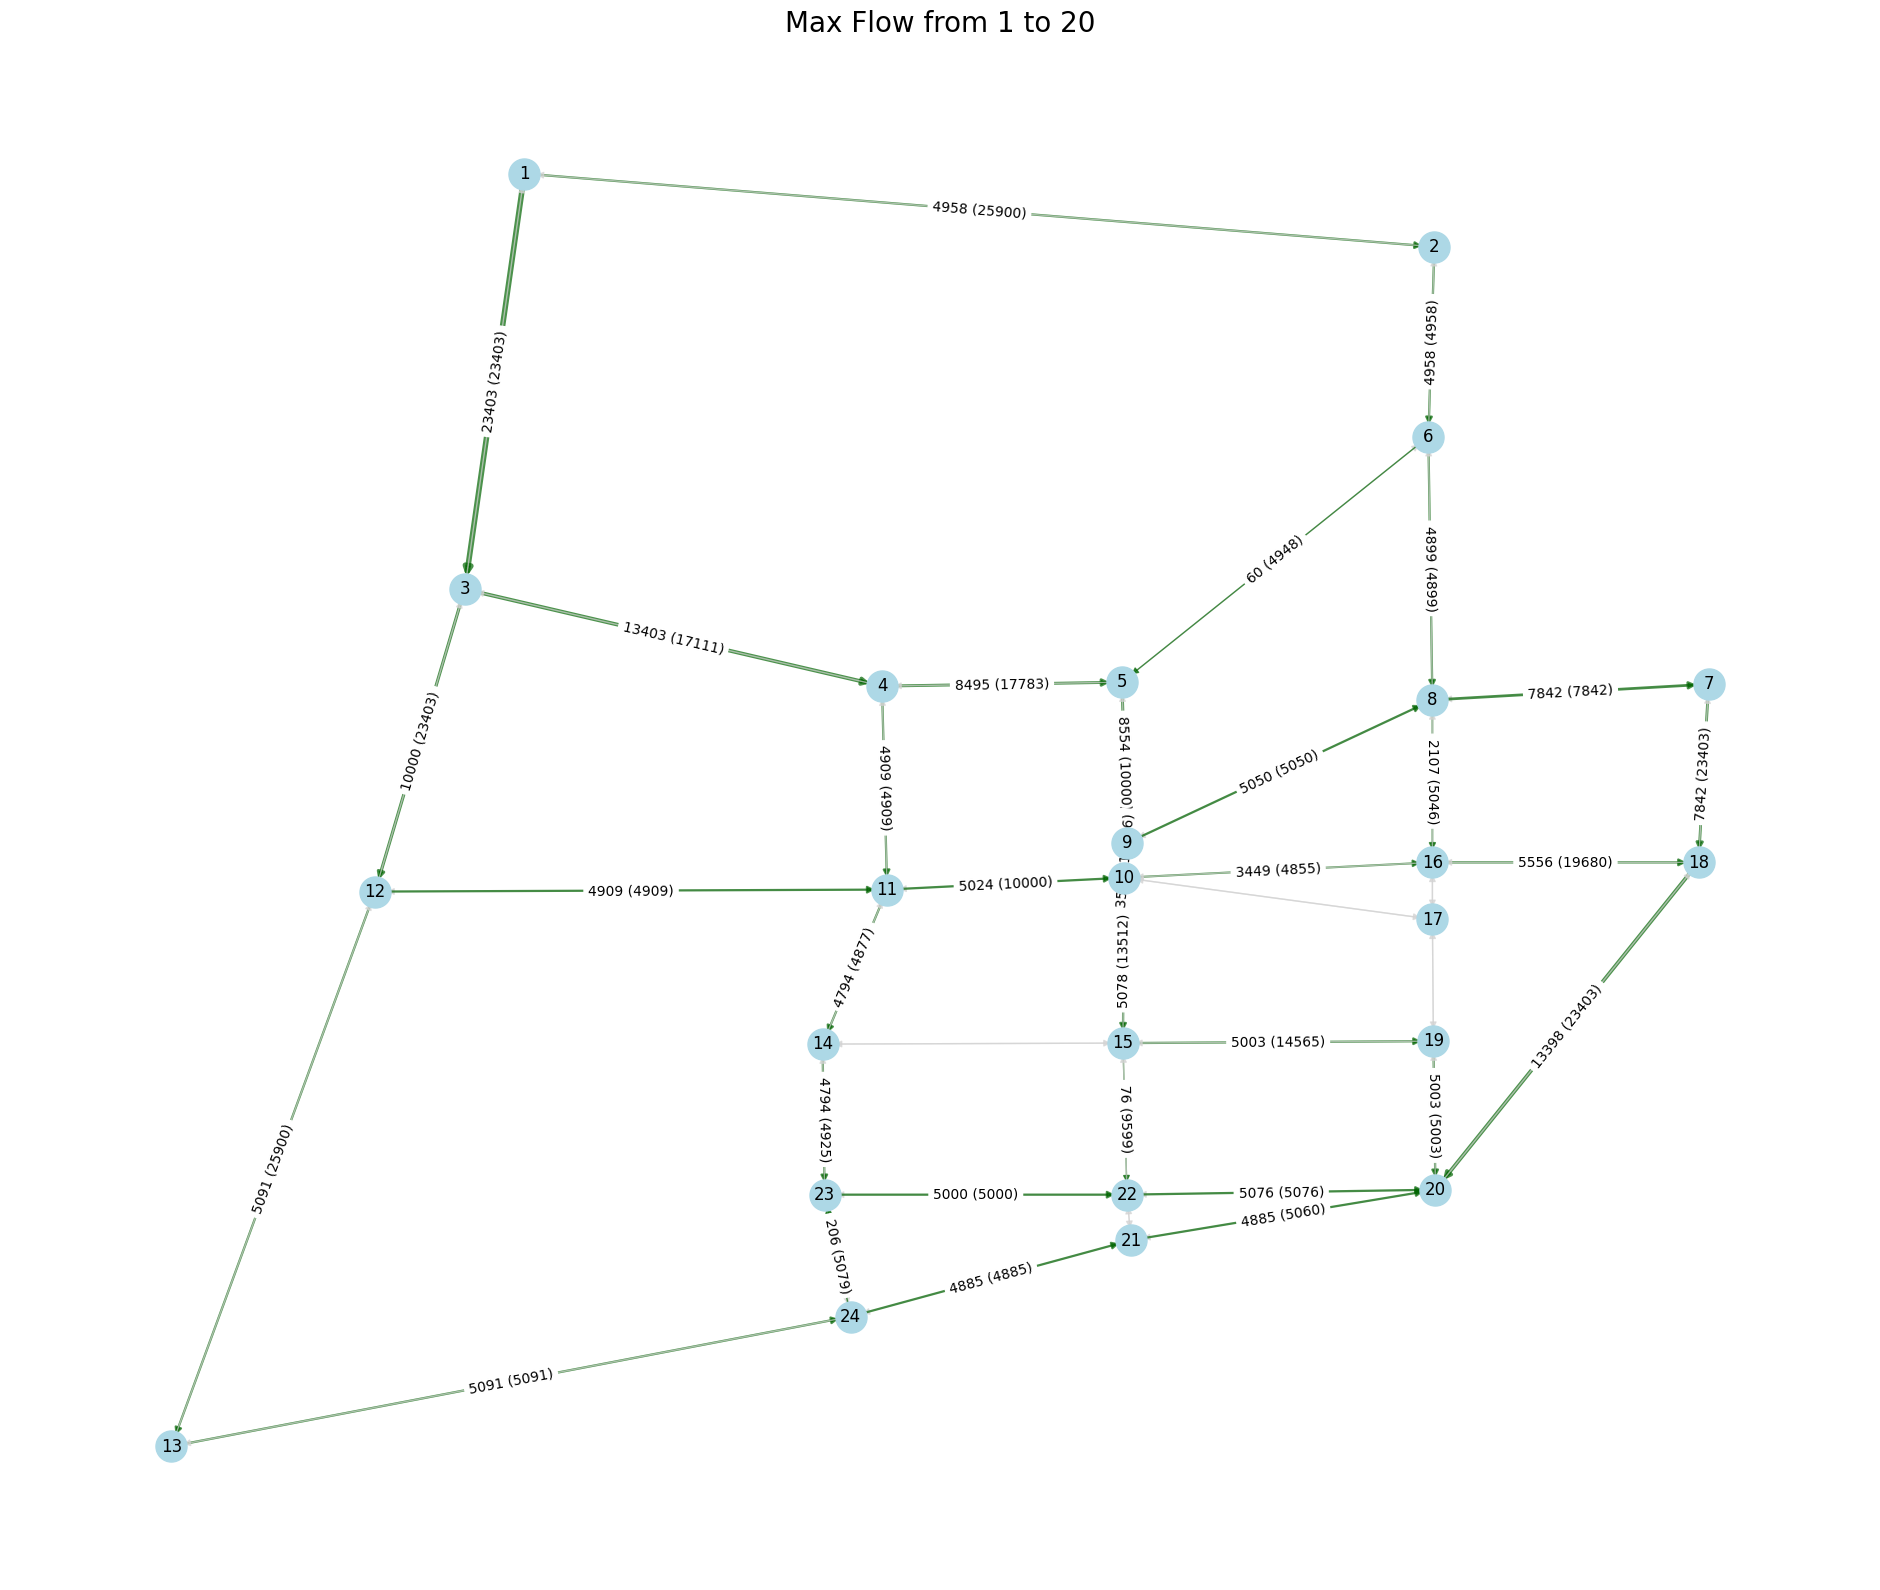

In [35]:
source = 1
sink = 20

nodes, arcs, arc_data = load_sioux_falls_data()
model = build_max_flow_model_with_dummy(nodes, arcs, arc_data, source, sink)
solver = SolverFactory("glpk", executable="/usr/bin/glpsol")
solver.solve(model)

# Extract flow value on dummy arc = total max flow
total_flow = value(model.flow[(sink, source)])
print(f"✅ Maximum flow from node {source} to {sink}: {total_flow:.2f}")

for i, j in model.A:
    flow = value(model.flow[i, j])
    if flow > 1e-3 and (i, j) != (sink, source):
        print(f"Flow {flow:.2f} from {i} → {j}")


# After solving max flow model:
flow_values = {
    (i, j): value(model.flow[i, j])
    for (i, j) in model.A
    if (i, j) != (sink, source) and value(model.flow[i, j]) > 1e-3
}

draw_network_with_flows(nodes, arcs, arc_data, flow_values, coordinates=get_sioux_falls_coordinates(),title=f"Max Flow from {source} to {sink}")
